In [1]:
import numpy as np
import scipy.io as sio
from preprocess import preprocess
from initweights import initweights
from grdescent import grdescent
import matplotlib.pyplot as plt
from deepnet import deepnet
def bostondemo(wst = None):
        
    bostonData = sio.loadmat('./boston.mat')
    TRANSNAME = 'sigmoid'
    ROUNDS = 50 #default 200
    ITER = 70 #default 50
    STEPSIZE = 0.03; #default 0.01
    
    xTr = bostonData['xTr']
    xTe = bostonData['xTe']
    
    if wst == None:
        wst = np.array([1,20,20,20,np.shape(xTr)[0]])
    #print(wst)
    
    
    [xTr,xTe, _, _] = preprocess(xTr,xTe)
    
    w = initweights(wst)
        
    plt.figure()
    
    yTr = np.array(bostonData['yTr'])
    yTe = np.array(bostonData['yTe'])
    
    # Sort X and Y
    itr = np.argsort(yTr).flatten();
    ite = np.argsort(yTe).flatten();
    xTr = xTr[:, itr]
    xTe = xTe[:, ite]
    yTr = yTr[:, itr]
    yTe = yTe[:, ite]
    
    xtr = np.arange(0,np.shape(yTr)[1])
    xte = np.arange(0,np.shape(yTe)[1])
    plt.subplot(1,3,1);plt.title('TRAIN')
    plt.plot(xtr, yTr.flatten(), 'r', linewidth=5)
    linePredTr = plt.plot(xtr, np.ones(len(xtr)), 'k.')
    plt.subplot(1,3,2);plt.title('TEST')
    plt.plot(xte,yTe.flatten(), 'r', linewidth=5)
    linePredTe = plt.plot(xte, np.ones(len(xte)), 'k.')
    errTr = []
    errTe = []
    f = lambda w: deepnet(w, xTr, yTr, wst, TRANSNAME)
    for i in range(ROUNDS):
        w = grdescent(f, w, STEPSIZE, ITER, 1e-8)
        predTr=deepnet(w,xTr,[],wst,TRANSNAME)
        predTe=deepnet(w,xTe,[],wst,TRANSNAME)
        errTr.append(np.sqrt(np.mean((predTr-yTr)**2)));
        errTe.append(np.sqrt(np.mean((predTe-yTe)**2)));
        linePredTr[0].set_data(xtr, predTr.flatten())
        linePredTe[0].set_data(xte, predTe.flatten())
        plt.subplot(1,3,3);plt.title('RMSE Errors')
        lineErrTr = plt.plot(errTr,'g', label = 'train')
        lineErrTe = plt.plot(errTe,'b', label = 'test')
        plt.legend(handles=[lineErrTr[0], lineErrTe[0]])
        plt.pause(0.05)
        
    plt.show()
    print("TRANSNAME:", TRANSNAME)
    print("ROUNDS:", ROUNDS)
    print("ITER:", ITER)
    print("STEPSIZE:", STEPSIZE)
    print('Lowest train score: {}'.format(np.min(errTr)));
    print('Lowest test score: {}'.format(np.min(errTe)));



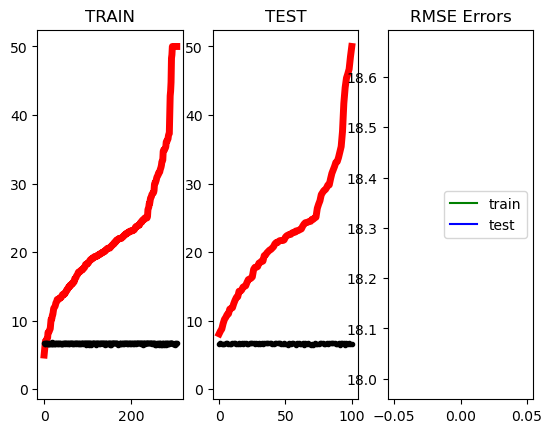

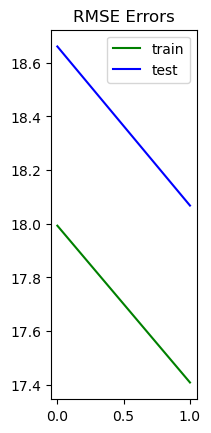

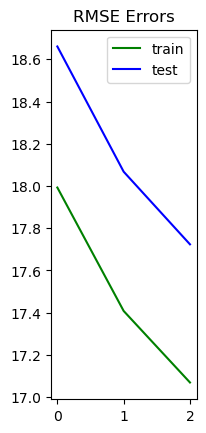

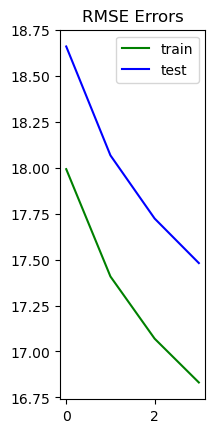

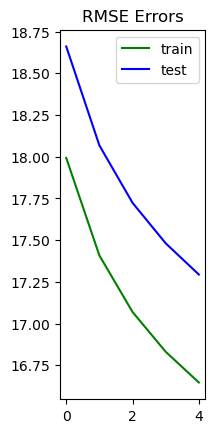

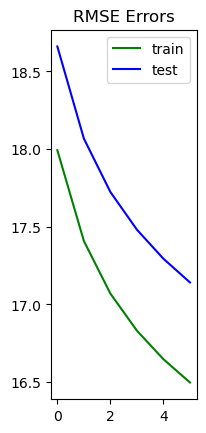

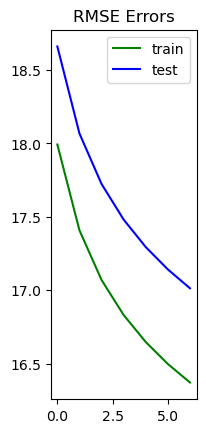

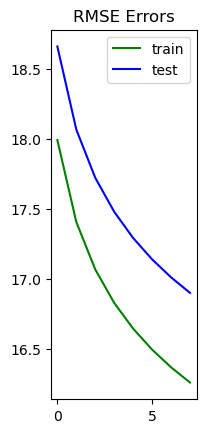

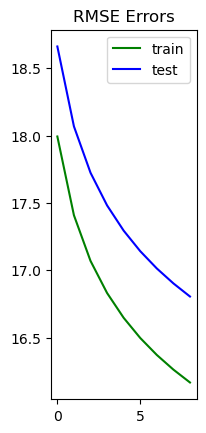

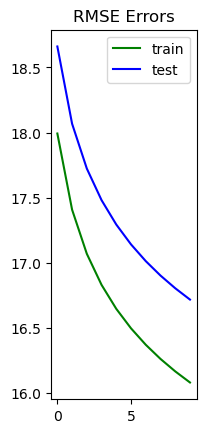

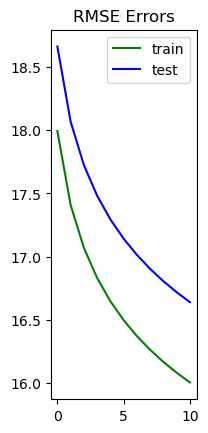

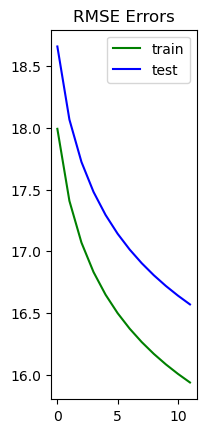

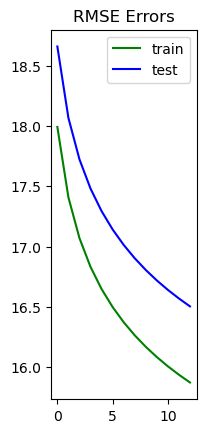

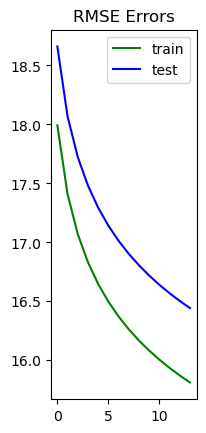

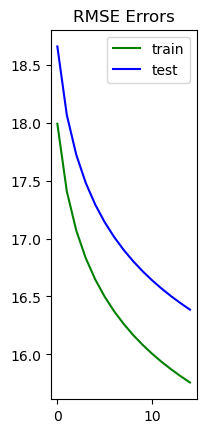

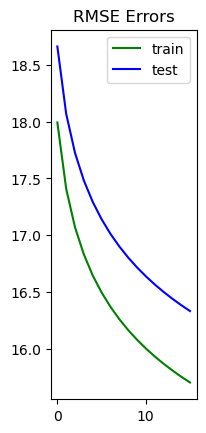

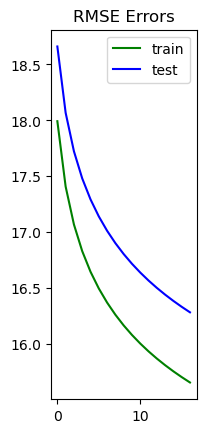

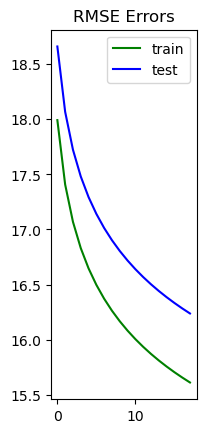

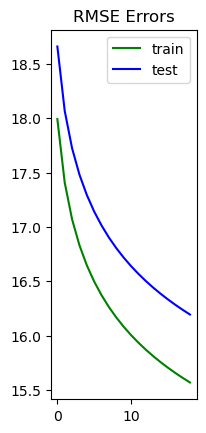

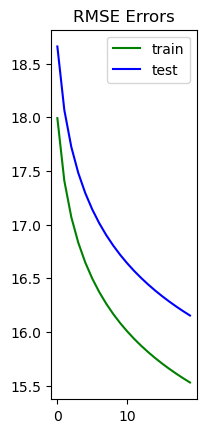

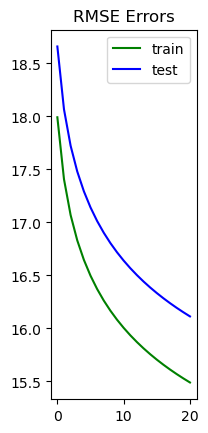

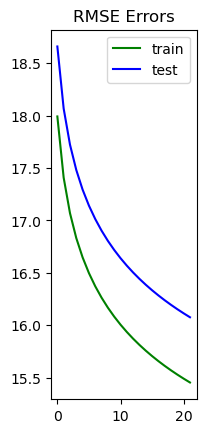

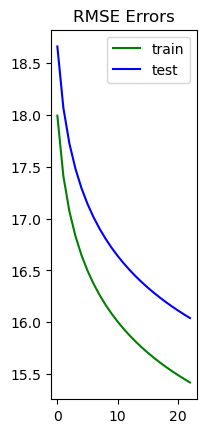

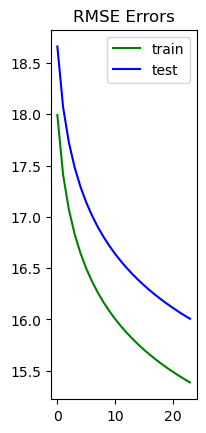

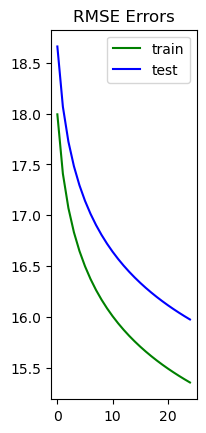

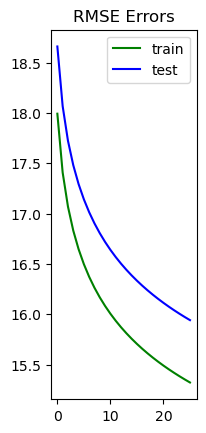

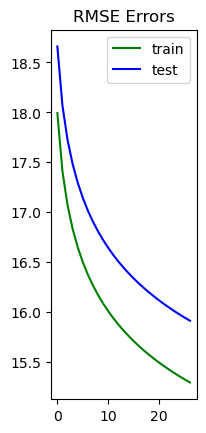

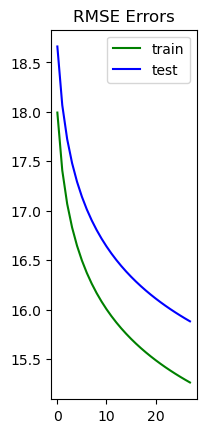

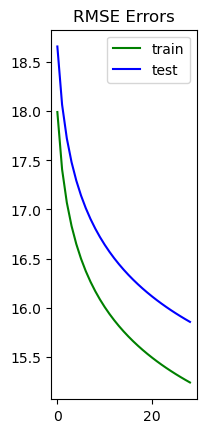

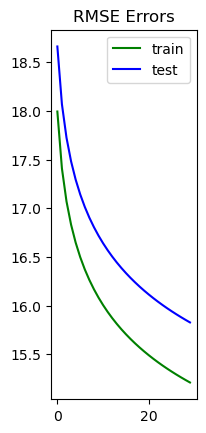

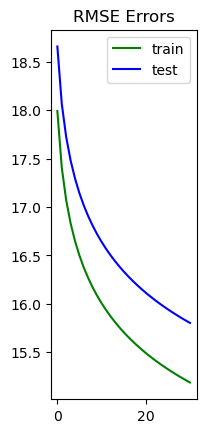

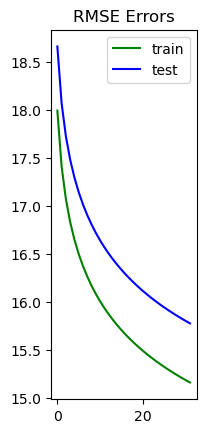

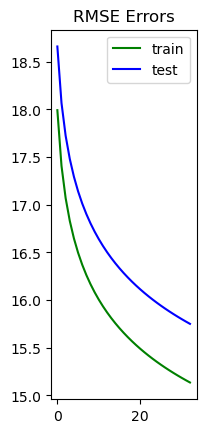

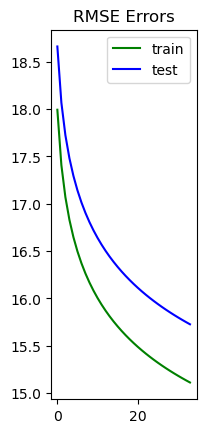

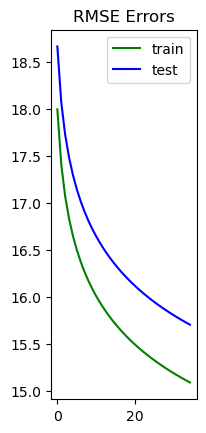

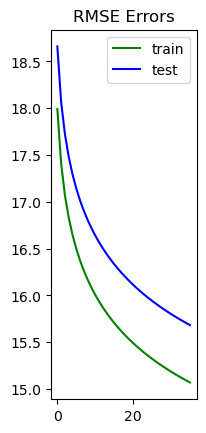

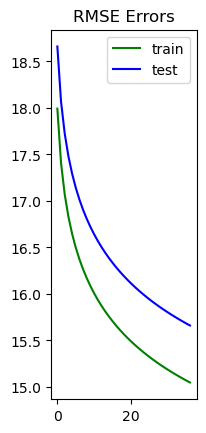

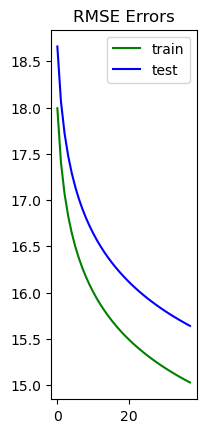

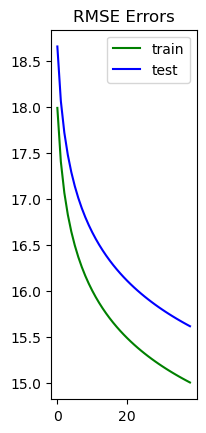

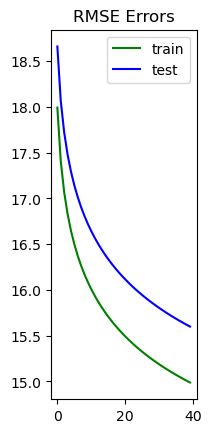

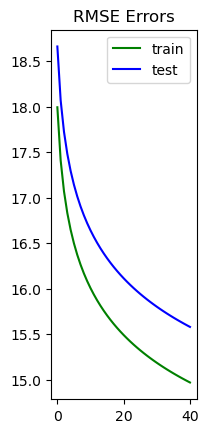

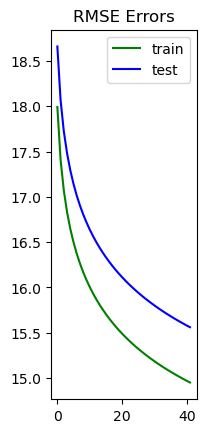

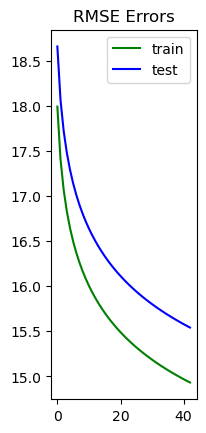

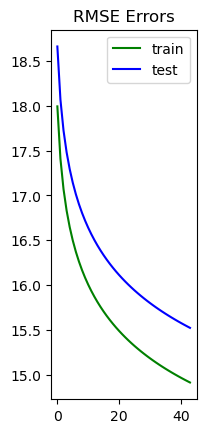

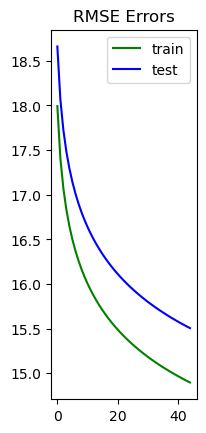

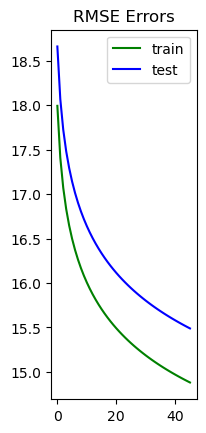

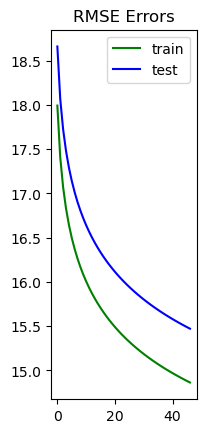

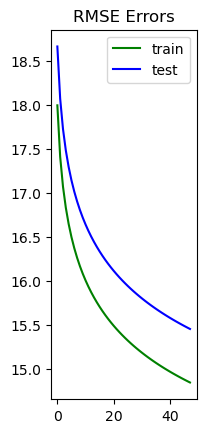

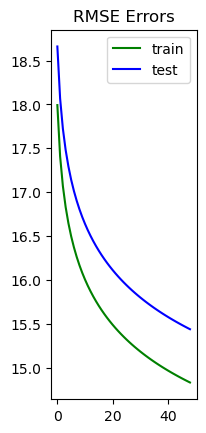

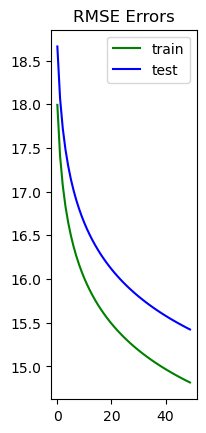

TRANSNAME: sigmoid
ROUNDS: 50
ITER: 70
STEPSIZE: 0.03
Lowest train score: 14.816646086221228
Lowest test score: 15.423207699725337


In [2]:
bostondemo()